Satellite Imagery Data Preparation



In [ ]:
!pip install patchify

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
#dataset_root_folder = '/content/drive/MyDrive/DS/DS_III/DSC4173/Mini Project_ML/'

In [ ]:
dataset_root_folder = '/content/drive/MyDrive/DS/DS_III/DSC4173/Mini Project - DSC 4173/datasets/GBW/'

In [ ]:
#dataset_name = "SLData"

In [ ]:
image_patch_size = 256

In [ ]:
image1 = image = cv2.imread(f'{dataset_root_folder}/images/20.jpg',1)
#image1

In [ ]:
image_patches = patchify(image1, (image_patch_size, image_patch_size, 3),step = image_patch_size)
image_patches

array([[[[[[ 58,  72,  66],
           [ 58,  73,  65],
           [ 76,  91,  83],
           ...,
           [ 45,  61,  54],
           [ 40,  55,  51],
           [ 46,  62,  55]],

          [[ 65,  79,  73],
           [ 55,  70,  62],
           [ 59,  75,  64],
           ...,
           [ 48,  64,  57],
           [ 40,  55,  51],
           [ 39,  55,  48]],

          [[ 81,  96,  88],
           [ 69,  84,  76],
           [ 61,  77,  66],
           ...,
           [ 44,  60,  53],
           [ 38,  54,  47],
           [ 49,  65,  58]],

          ...,

          [[ 60,  76,  65],
           [ 61,  77,  66],
           [ 55,  72,  61],
           ...,
           [101, 127, 113],
           [ 71,  97,  83],
           [ 61,  90,  75]],

          [[ 62,  78,  67],
           [ 57,  73,  62],
           [ 51,  69,  56],
           ...,
           [ 95, 122, 106],
           [ 46,  75,  59],
           [ 40,  69,  54]],

          [[ 70,  86,  75],
           [ 67,  84,  73]

In [ ]:
len(image_patches)

8

In [ ]:
image_dataset = []
#mask_dataset = []

image_extension = 'jpg'
for image_id in range(1,24):
  image = cv2.imread(f'{dataset_root_folder}/images/{image_id}.{image_extension}',1)
  if image is not None:
    size_x = (image.shape[1]//image_patch_size)*image_patch_size
    size_y = (image.shape[0]//image_patch_size)*image_patch_size
    print("{} --- {} - {}".format(image.shape, size_x, size_y))



(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 2132, 3) --- 2048 - 2048
(2160, 1988, 3) --- 1792 - 2048
(2160, 2121, 3) --- 2048 - 2048
(2160, 2154, 3) --- 2048 - 2048
(2160, 2195, 3) --- 2048 - 2048
(2160, 2182, 3) --- 2048 - 2048
(2160, 2219, 3) --- 2048 - 2048
(2160, 2161, 3) --- 2048 - 2048
(2160, 2187, 3) --- 2048 - 2048
(2160, 2107, 3) --- 2048 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048
(2160, 3840, 3) --- 3840 - 2048


In [ ]:
print(type(image1))

<class 'numpy.ndarray'>


In [ ]:
type(Image.fromarray(image1))

PIL.Image.Image

In [ ]:
image_dataset = []

image_extension = 'jpg'
for image_id in range(1,24):
  image = cv2.imread(f'{dataset_root_folder}/images/{image_id}.{image_extension}',1)
  if image is not None:
    size_x = (image.shape[1]//image_patch_size)*image_patch_size
    size_y = (image.shape[0]//image_patch_size)*image_patch_size
    #print("{} --- {} - {}".format(image.shape, size_x, size_y))
    image = Image.fromarray(image)
    image = image.crop((0,0, size_x, size_y))
    print("({},  {})".format(image.size[0],image.size[1]))

(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)
(3840,  2048)


In [ ]:
image_dataset = []

image_extension = 'jpg'
for image_id in range(1,24):
  image = cv2.imread(f'{dataset_root_folder}/images/{image_id}.{image_extension}',1)
  if image is not None:
    size_x = (image.shape[1]//image_patch_size)*image_patch_size
    size_y = (image.shape[0]//image_patch_size)*image_patch_size
    #print("{} --- {} - {}".format(image.shape, size_x, size_y))
    image = Image.fromarray(image)
    image = image.crop((0,0, size_x, size_y))
    #print("({},  {})".format(image.size[0],image.size[1]))
    image = np.array(image)
    patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
    print(len(patched_images))

8
8
8
8
8
8
8
8
8
8
8
8
8
8


In [ ]:
image_dataset = []

image_extension = 'jpg'
for image_id in range(1,24):
  image = cv2.imread(f'{dataset_root_folder}/images/{image_id}.{image_extension}',1)
  if image is not None:
    size_x = (image.shape[1]//image_patch_size)*image_patch_size
    size_y = (image.shape[0]//image_patch_size)*image_patch_size
    #print("{} --- {} - {}".format(image.shape, size_x, size_y))
    image = Image.fromarray(image)
    image = image.crop((0,0, size_x, size_y))
    #print("({},  {})".format(image.size[0],image.size[1]))
    image = np.array(image)
    patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
    print(len(patched_images))
    for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
            individual_patched_image = patched_images[i,j,:,:]
            print(individual_patched_image.shape)

8
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256

In [ ]:
image_dataset = []

image_extension = 'jpg'
for image_id in range(1,24):
  image = cv2.imread(f'{dataset_root_folder}/images/{image_id}.{image_extension}',1)
  if image is not None:
    size_x = (image.shape[1]//image_patch_size)*image_patch_size
    size_y = (image.shape[0]//image_patch_size)*image_patch_size
    #print("{} --- {} - {}".format(image.shape, size_x, size_y))
    image = Image.fromarray(image)
    image = image.crop((0,0, size_x, size_y))
    #print("({},  {})".format(image.size[0],image.size[1]))
    image = np.array(image)
    patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
    print(len(patched_images))
    for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
            individual_patched_image = patched_images[i,j,:,:]
            #print(individual_patched_image.shape)
            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
            individual_patched_image = individual_patched_image[0]
            print(individual_patched_image.shape)

8
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256

In [ ]:
image_dataset = []

image_extension = 'jpg'
for image_id in range(14,24):
  image = cv2.imread(f'{dataset_root_folder}/images/{image_id}.{image_extension}',1)
  if image is not None:
    size_x = (image.shape[1]//image_patch_size)*image_patch_size
    size_y = (image.shape[0]//image_patch_size)*image_patch_size
    #print("{} --- {} - {}".format(image.shape, size_x, size_y))
    image = Image.fromarray(image)
    image = image.crop((0,0, size_x, size_y))
    #print("({},  {})".format(image.size[0],image.size[1]))
    image = np.array(image)
    patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
    print(len(patched_images))
    for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
            individual_patched_image = patched_images[i,j,:,:]
            #print(individual_patched_image.shape)
            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
            individual_patched_image = individual_patched_image[0]
            #print(individual_patched_image.shape)
            image_dataset.append(individual_patched_image)

8
8
8
8
8
8
8
8
8
8


In [ ]:
len(image_dataset)

864

In [ ]:
mask_dataset = []

image_extension = 'png'
for image_id in range(14,24):
  image = cv2.imread(f'{dataset_root_folder}/masks/{image_id}.{image_extension}',1)
  if image is not None:
     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
     size_x = (image.shape[1]//image_patch_size)*image_patch_size
     size_y = (image.shape[0]//image_patch_size)*image_patch_size
     #print("{} --- {} - {}".format(image.shape, size_x, size_y))
     image = Image.fromarray(image)
     image = image.crop((0,0, size_x, size_y))
     #print("({},  {})".format(image.size[0],image.size[1]))
     image = np.array(image)
     patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
     print(len(patched_images))
     for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
            individual_patched_mask = patched_images[i,j,:,:]
            #print(individual_patched_image.shape)
            #individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
            individual_patched_mask = individual_patched_mask[0]
            #print(individual_patched_image.shape)
            mask_dataset.append(individual_patched_mask)

8
8
8
8
8
8
8
8
8
8


In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

864
864


In [ ]:
image_dataset = np.array(image_dataset)

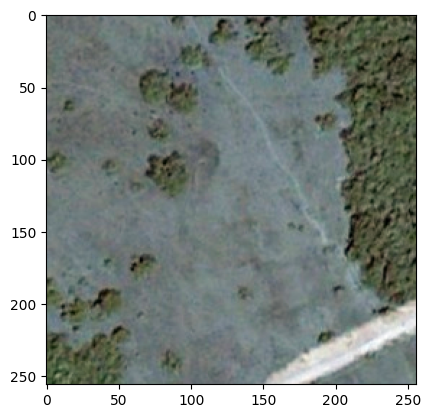

In [ ]:
plt.imshow(image_dataset[0])

In [ ]:
mask_dataset = np.array(mask_dataset)

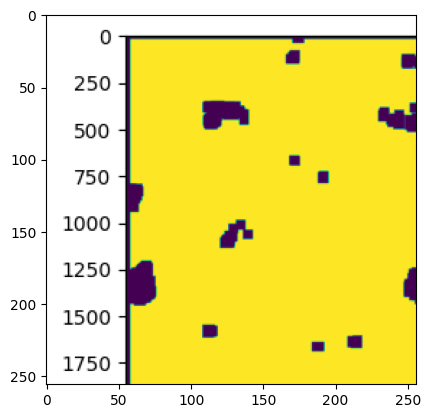

In [ ]:
plt.imshow(mask_dataset[0])

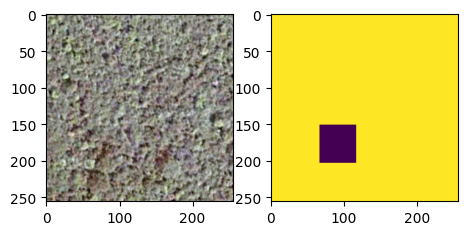

In [ ]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(154)
plt.imshow(image_dataset[random_image_id])
plt.subplot(155)
plt.imshow(mask_dataset[random_image_id])

In [ ]:
tree = '#440154'
tree = tree.lstrip('#')
tree= np.array(tuple(int(tree[i:i+2], 16) for i in (0,2,4)))
print(tree)

non_tree = '#fde724'
non_tree = non_tree.lstrip('#')
non_tree = np.array(tuple(int(non_tree[i:i+2], 16) for i in (0,2,4)))
print(non_tree)
#class_road = '#6EC1E4'
#class_road = class_road.lstrip('#')
#class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
#print(class_road)

#class_vegetation = '#FEDD3A'
#class_vegetation = class_vegetation.lstrip('#')
#class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
#print(class_vegetation)

#class_water = '#E2A929'
#class_water = class_water.lstrip('#')
#class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
#print(class_water)

#class_unlabeled = '#9B9B9B'
#class_unlabeled = class_unlabeled.lstrip('#')
#class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
#print(class_unlabeled)

[68  1 84]
[253 231  36]


In [ ]:
label = individual_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == tree, axis=-1)] = 0
  label_segment[np.all(label == non_tree, axis=-1)] = 1
  #label_segment[np.all(label == class_road, axis=-1)] = 2
  #label_segment[np.all(label == class_building, axis=-1)] = 3
  #label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  #label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [ ]:
print(len(labels))

864


In [ ]:
labels = np.array(labels)
#labels = np.expand_dims(labels, axis=3)

In [ ]:
labels[1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
labels = np.expand_dims(labels, axis=3)

In [ ]:
labels[0]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [ ]:
np.unique(labels)

array([0, 1], dtype=uint8)

In [ ]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1]


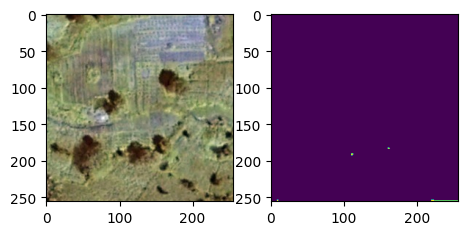

In [ ]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(154)
plt.imshow(image_dataset[random_image_id])
plt.subplot(155)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

Training and Spiltting

In [ ]:
total_classes = len(np.unique(labels))

In [ ]:
total_classes

2

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [ ]:
labels_categorical_dataset

array([[[[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        ...,

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]]],


       [[[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
   

In [ ]:
labels_categorical_dataset.shape

(2192, 256, 256, 2)

In [ ]:
master_trianing_dataset = image_dataset

In [ ]:
master_trianing_dataset.shape

(2192, 256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 256, 256, 3)
(130, 256, 256, 3)
(734, 256, 256, 2)
(130, 256, 256, 2)


In [ ]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


Deep Learning with Satellite Imagery Data

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from keras import backend as K

set up evalution matrix :
  loU = overlap/ union :
  (jaccard index) = loU

In [ ]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


U net model : netron

In [ ]:
def multi_unet_model(n_classes=2, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

Setting matrix

In [ ]:
metrics = ["accuracy", jaccard_coef]

In [ ]:
metrics

['accuracy', <function __main__.jaccard_coef(y_true, y_pred)>]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model()

In [ ]:
# Please uncomment this line to get model confiuration
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   

## Generating Loss Function (Cross Entropy Loss Extension)

- dice loss > Focal Loss > Total Loss
- Total Loss = (Dice loss + (1*Focal Loss))

In [ ]:
weights = [0.5,0.5]

In [ ]:
!pip install -U segmentation-models==0.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm


Segmentation Models: using `tf.keras` framework.


In [ ]:
import segmentation_models as sm

In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [ ]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [ ]:
total_loss = dice_loss + (1 * focal_loss)

## Model compilation

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()


In [ ]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

Model Training

In [ ]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/100
46/46 [==============================] - 37s 333ms/step - loss: 0.7601 - accuracy: 0.6953 - jaccard_coef: 0.4046 - val_loss: 0.7012 - val_accuracy: 0.7598 - val_jaccard_coef: 0.5334
Epoch 2/100
46/46 [==============================] - 10s 209ms/step - loss: 0.6909 - accuracy: 0.7962 - jaccard_coef: 0.5953 - val_loss: 0.7121 - val_accuracy: 0.7351 - val_jaccard_coef: 0.5469
Epoch 3/100
46/46 [==============================] - 9s 206ms/step - loss: 0.6820 - accuracy: 0.8084 - jaccard_coef: 0.6101 - val_loss: 0.6937 - val_accuracy: 0.7761 - val_jaccard_coef: 0.5719
Epoch 4/100
46/46 [==============================] - 9s 204ms/step - loss: 0.6732 - accuracy: 0.8227 - jaccard_coef: 0.6283 - val_loss: 0.6896 - val_accuracy: 0.7796 - val_jaccard_coef: 0.5749
Epoch 5/100
46/46 [==============================] - 9s 203ms/step - loss: 0.6640 - accuracy: 0.8359 - jaccard_coef: 0.6494 - val_loss: 0.6797 - val_accuracy: 0.7951 - val_jaccard_coef: 0.5983
Epoch 6/100
46/46 [==============

In [ ]:
history_a = model_history

In [ ]:
history_a.history

{'loss': [0.7600919008255005,
  0.6908762454986572,
  0.6820095181465149,
  0.6731916069984436,
  0.6640135049819946,
  0.6567150950431824,
  0.6547162532806396,
  0.6522974967956543,
  0.6507039666175842,
  0.6500673890113831,
  0.6491565108299255,
  0.6485464572906494,
  0.6477804780006409,
  0.6447670459747314,
  0.645009458065033,
  0.6444077491760254,
  0.6430113315582275,
  0.6421009302139282,
  0.6405296921730042,
  0.6394503116607666,
  0.6365290880203247,
  0.6374834179878235,
  0.6359118819236755,
  0.634972870349884,
  0.6346198320388794,
  0.632535457611084,
  0.6319563984870911,
  0.6300012469291687,
  0.6274279952049255,
  0.6229328513145447,
  0.621674656867981,
  0.6266541481018066,
  0.624319851398468,
  0.620505690574646,
  0.6203667521476746,
  0.6172911524772644,
  0.6139358878135681,
  0.6133034229278564,
  0.6175161004066467,
  0.6050946116447449,
  0.6037611961364746,
  0.5998736619949341,
  0.5972805023193359,
  0.5965602397918701,
  0.5982633233070374,
  0.6001

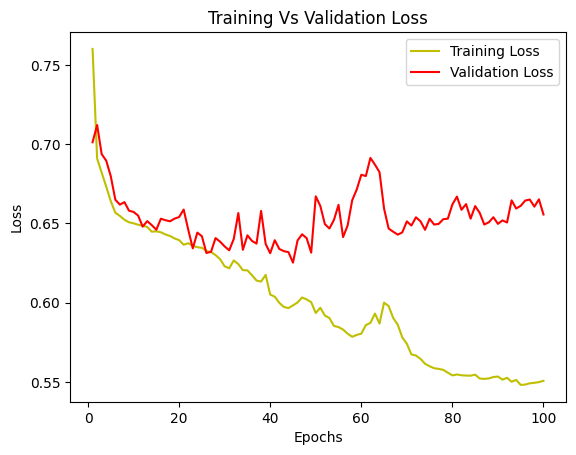

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

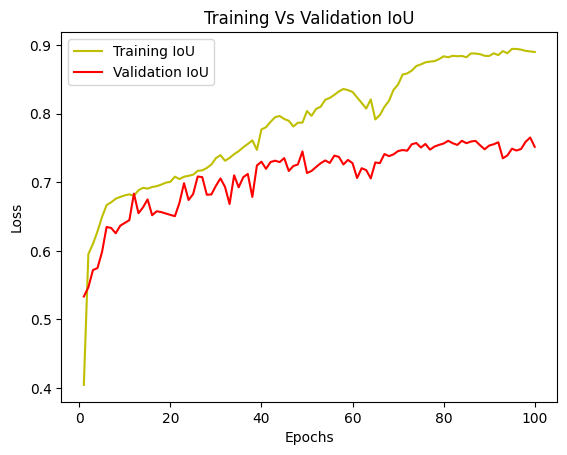

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 46}

In [ ]:
y_pred = model.predict(X_test)

5/5 [==============================] - 3s 53ms/step


In [ ]:
len(y_pred)

130

In [ ]:
y_pred

array([[[[6.25355029e-03, 5.43853939e-01, 6.95939586e-02,
          3.29653651e-01, 4.61609699e-02, 4.48396709e-03],
         [1.45108753e-03, 6.49073303e-01, 3.15182619e-02,
          2.98516840e-01, 1.91219281e-02, 3.18531616e-04],
         [1.39486184e-03, 6.18398309e-01, 3.33664194e-02,
          3.26276690e-01, 2.03582626e-02, 2.05488774e-04],
         ...,
         [1.42421562e-03, 6.17822707e-01, 3.69475447e-02,
          3.27017456e-01, 1.66972447e-02, 9.07602807e-05],
         [2.03904370e-03, 6.53563321e-01, 3.89603190e-02,
          2.75864333e-01, 2.94913556e-02, 8.15894309e-05],
         [1.78226270e-02, 5.00828981e-01, 7.01375455e-02,
          3.12451839e-01, 9.78537425e-02, 9.05289315e-04]],

        [[2.08122772e-03, 6.50545061e-01, 3.33536342e-02,
          2.94232279e-01, 1.91551782e-02, 6.32567040e-04],
         [2.70711549e-04, 7.07527161e-01, 1.35628665e-02,
          2.72320896e-01, 6.29915670e-03, 1.92378156e-05],
         [1.82464981e-04, 6.42120898e-01, 1.1892

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [ ]:
len(y_pred_argmax)

130

In [ ]:
y_pred_argmax

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 

In [ ]:
y_test_argmax = np.argmax(y_test, axis=3)

In [ ]:
y_test_argmax

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Comparing prediction results
-  using test images using mask images and predicted result images..

In [ ]:
import random


In [ ]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 21ms/step


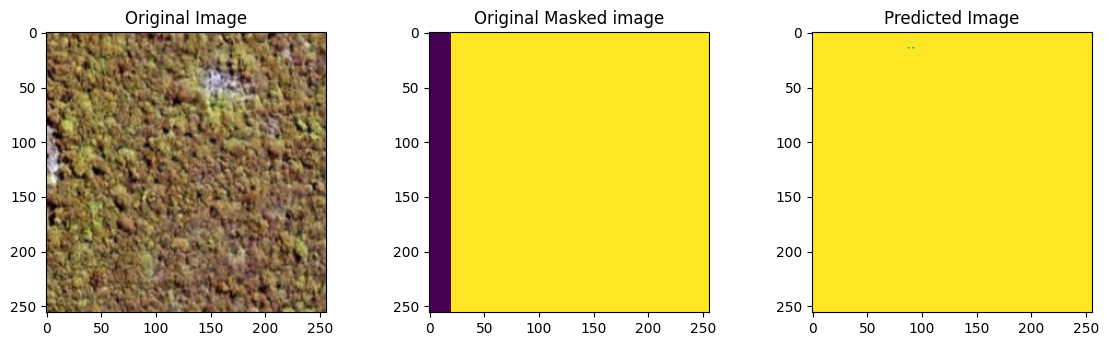

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [ ]:
#model.save("satellite_segmentation_full.h5")

In [ ]:
!ls -lah

total 20K
drwxr-xr-x 1 root root 4.0K Aug 11 11:39 .
drwxr-xr-x 1 root root 4.0K Aug 11 11:38 ..
drwxr-xr-x 4 root root 4.0K Aug  9 13:36 .config
drwx------ 6 root root 4.0K Aug 11 11:39 drive
drwxr-xr-x 1 root root 4.0K Aug  9 13:37 sample_data
